### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

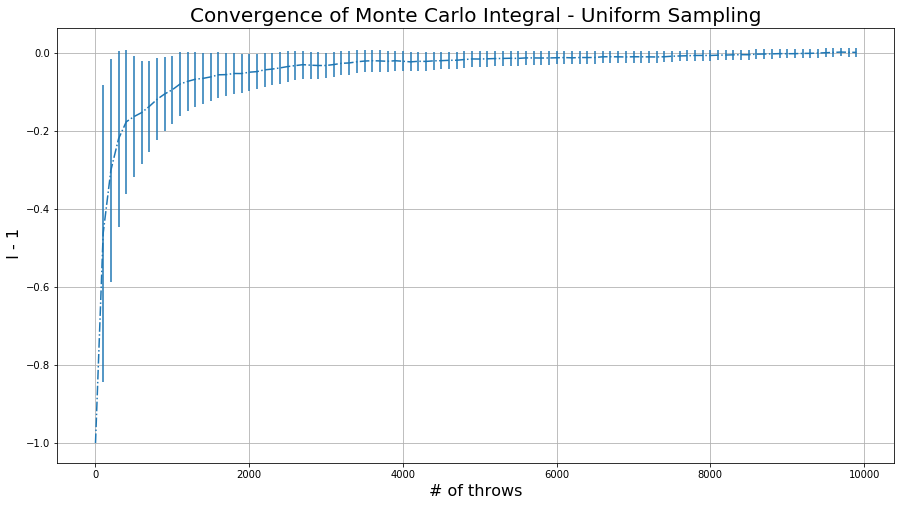

In [5]:
integrals = np.loadtxt("es2_1/results.dat")
err = np.loadtxt("es2_1/errors.dat")

M=1e4
N=1e2
L = int(M/N)

x = L* np.arange(N)

plt.figure(figsize=(15,8))
plt.errorbar(x,integrals - 1,yerr=err,fmt='-.')
plt.title('')
plt.xlabel("# of throws",fontsize = 16)
plt.ylabel(" I - 1",fontsize = 16)
plt.title('Convergence of Monte Carlo Integral - Uniform Sampling',fontsize = 20)
plt.grid(True)
plt.show()

### Importance sampling
For importance sampling, I used the distribution $$p(x) = \frac{1}{A} \frac{1}{1+\frac{x^2}{k^2}} $$ where $$ A = k tan^{-1}\left(\frac{1}{k}\right)$$ for normalization, and k has been chosen as $$ k=0.6 $$ to make the distribution "more similar" to the integrand, as shown below <br> By inverting the cumulative function $$\int_0^x p(x)dx = \frac{k}{A} tan^{-1}\left( \frac{x}{k} \right) = y$$ <br> the random variable is extracted as $$ x = k tan\left(\frac{A}{k}y\right)$$ <br> where y is extracted uniformly in [0,1)

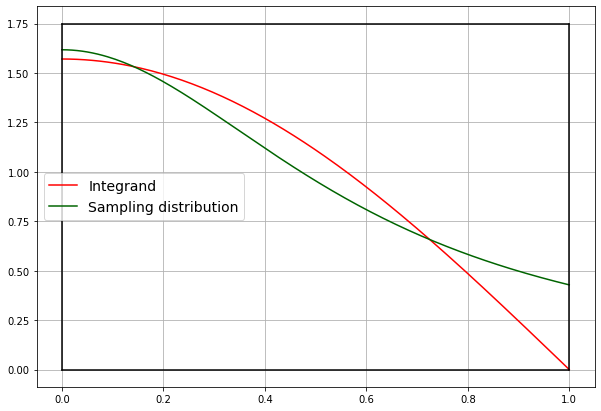

In [13]:
x = np.linspace(0,1,200)
C = np.pi/2. * np.cos(np.pi/2. * x)
K = 0.6
A = K* np.arctan(1./K)
P = 1/A * 1/(1+(x/K)**2)

plt.figure(figsize = (10,7))
plt.plot(x,C,color = 'red')
plt.plot(x,P, color = 'darkgreen')
plt.plot(np.zeros(10),np.linspace(0,1.75,10),color = 'black')
plt.plot(np.ones(10),np.linspace(0,1.75,10),color = 'black')
plt.plot(np.linspace(0,1,10),np.zeros(10),color = 'black')
plt.plot(np.linspace(0,1,10),1.75*np.ones(10),color = 'black')


plt.grid()
plt.legend(['Integrand','Sampling distribution'],fontsize = 14)

plt.show()

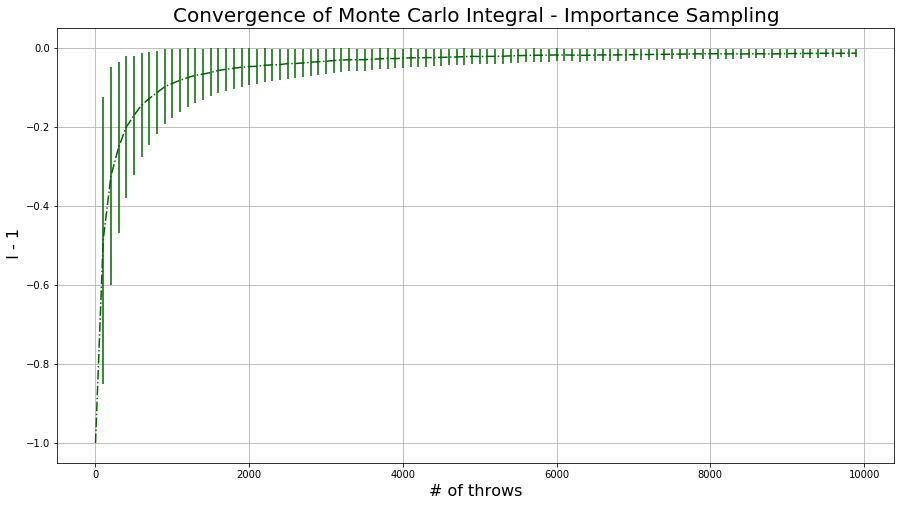

In [17]:
integrals = np.loadtxt("es2_102/results.dat")
err = np.loadtxt("es2_102/errors.dat")

M=1e4
N=1e2
L = int(M/N)

x = L* np.arange(N)

plt.figure(figsize=(15,8))
plt.errorbar(x,integrals - 1,yerr=err,fmt = '-.',color = 'darkgreen')
plt.title('Convergence of Monte Carlo Integral - Importance Sampling',fontsize = 20)
plt.xlabel("# of throws",fontsize = 16)
plt.ylabel(" I - 1",fontsize = 16)
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

The estimation for the constant k is:  0.92468106571313


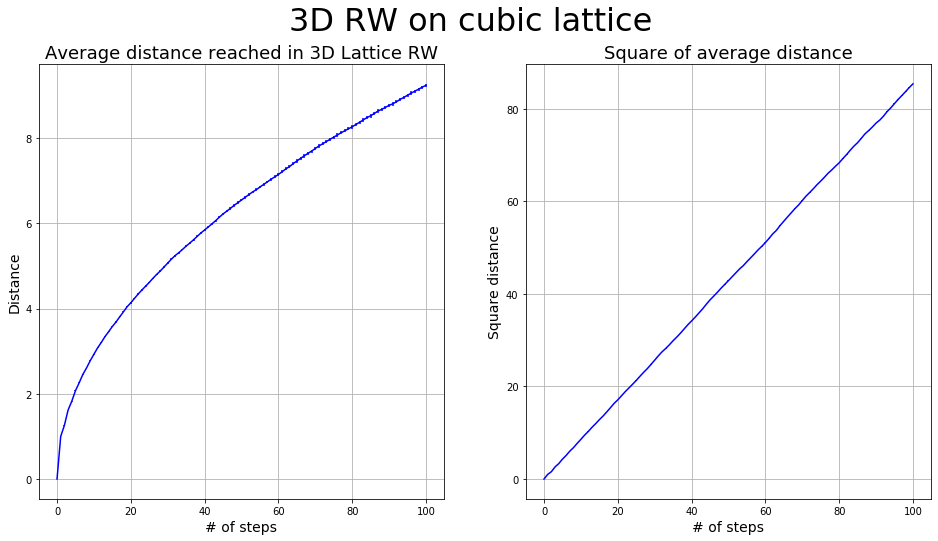

In [37]:
dist = np.loadtxt('es2_2/results.dat')
err = np.loadtxt('es2_2/errors.dat')

dist = np.insert(dist, 0, 0)
err = np.insert(err,0,0)

N=dist.size
x = np.arange(N)

fig = plt.figure(figsize=(16,8))
fig.suptitle('3D RW on cubic lattice',fontsize = 32)

ax1 = fig.add_subplot(121)

ax1.errorbar(x,dist,yerr=err,color = 'blue')
ax1.set_title('Average distance reached in 3D Lattice RW',fontsize = 18)
ax1.set_xlabel("# of steps",fontsize = 14)
ax1.set_ylabel("Distance",fontsize = 14)
ax1.grid(True)

dist2 = dist**2
fit = np.polyfit(x,dist2,1)

ax2 = fig.add_subplot(122)

ax2.errorbar(x,dist2,yerr=err,color = 'blue')
ax2.set_title('Square of average distance',fontsize = 18)
ax2.set_xlabel("# of steps",fontsize = 14)
ax2.set_ylabel("Square distance",fontsize = 14)
ax2.grid(True)

k = np.sqrt(fit[0])

print('The estimation for the constant k is: ',k)

plt.show()

The left side plot shows a distribution which looks like a $k\sqrt{N}$ function. This is confirmed by the right side plot, which is its square, and clearly is a linear function. The constant $k$ (rather, $k^2$) above is computed with a linear regression on the "linearized" plot.

The estimation for the constant k is:  0.9197964011752988


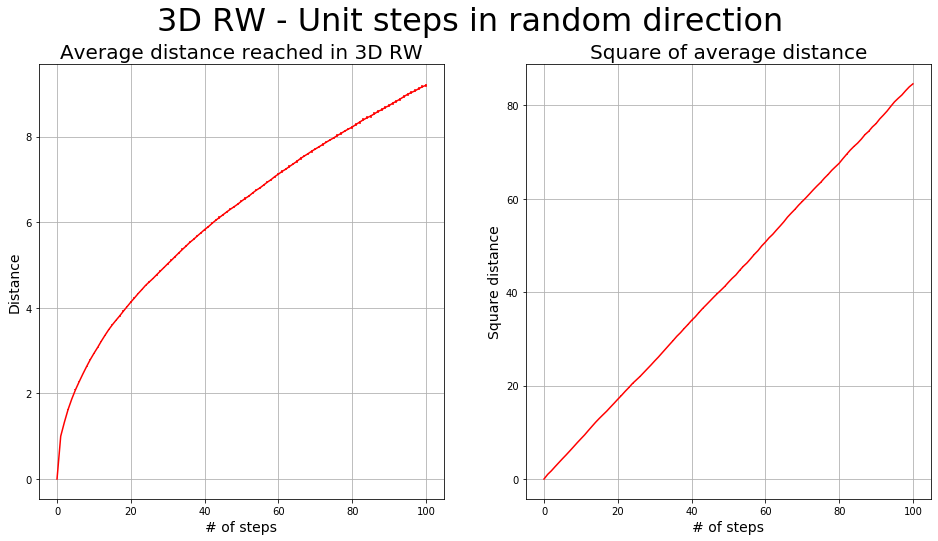

In [36]:
dist = np.loadtxt('es2_202/results.dat')
err = np.loadtxt('es2_202/errors.dat')

dist = np.insert(dist, 0, 0)
err = np.insert(err,0,0)

N=dist.size
x = np.arange(N)

fig = plt.figure(figsize=(16,8))
fig.suptitle('3D RW - Unit steps in random direction',fontsize = 32)

ax1 = fig.add_subplot(121)

ax1.errorbar(x,dist,yerr=err,color='red')
ax1.set_title('Average distance reached in 3D RW',fontsize = 20)
ax1.set_xlabel("# of steps",fontsize = 14)
ax1.set_ylabel("Distance",fontsize = 14)
ax1.grid(True)

dist2 = dist**2
fit = np.polyfit(x,dist2,1)

ax2 = fig.add_subplot(122)

ax2.errorbar(x,dist2,yerr=err,color='red')
ax2.set_title('Square of average distance',fontsize = 20)
ax2.set_xlabel("# of steps",fontsize = 14)
ax2.set_ylabel("Square distance",fontsize = 14)
ax2.grid(True)

k = np.sqrt(fit[0])

print('The estimation for the constant k is: ',k)

plt.show()